# GPU performance

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N_bsv = [10000, 30000, 70000, 100000, 300000, 500000, 700000, 800000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, 12000000, 16000000]
N_sc = [10000, 30000, 70000, 100000, 300000, 500000] #, 700000, 800000

N_bs=[100]
M_ests=[100, 200, 400]
m_sc = [60]

seeds = [1, 2, 3]

total_time_bsv = []
gpu_time_bsv = []
gflops_bsv = []
iter_bsv = []

for N_b in N_bs:
    total_time_bsv_N_b = []
    gpu_time_bsv_N_b = []
    gflops_bsv_N_b = []
    iter_bsv_N_b = []
    for M_est in M_ests:
        total_time_bsv_m = []
        gpu_time_bsv_m = []
        gflops_bsv_m = []
        iter_bsv_m = []
        for N in N_bsv:
            total_time_bsv_m_seed = []
            gpu_time_bsv_m_seed = []
            gflops_bsv_m_seed = []
            iter_bsv_m_seed = []
            for seed in seeds:
                try:
                    df = pd.read_csv(f'../log/A100_single/logFile_numPointsTotal{N}_numBlocksTotal{int(N/N_b)}_m{M_est}_seed{seed}_isScaled1_A100_single.csv')
                    total_time_bsv_m_seed.append(df['total'].iloc[0])
                    gpu_time_bsv_m_seed.append(df['computation'].iloc[0])
                    gflops_bsv_m_seed.append(df['total_gflops'].iloc[0])
                    iter_bsv_m_seed.append(df['iters'].iloc[0])
                except FileNotFoundError:
                    continue
            # print(len(total_time_bsv_m_seed))
            if len(total_time_bsv_m_seed) == 0 or np.isnan(np.mean(total_time_bsv_m_seed)):
                continue
            total_time_bsv_m.append(np.mean(total_time_bsv_m_seed))
            gpu_time_bsv_m.append(np.mean(gpu_time_bsv_m_seed))
            gflops_bsv_m.append(np.mean(gflops_bsv_m_seed))
            iter_bsv_m.append(np.mean(iter_bsv_m_seed))
        total_time_bsv_N_b.append(total_time_bsv_m) 
        gpu_time_bsv_N_b.append(gpu_time_bsv_m) 
        gflops_bsv_N_b.append(gflops_bsv_m) 
        iter_bsv_N_b.append(iter_bsv_m) 
    gpu_time_bsv.append(gpu_time_bsv_N_b)
    total_time_bsv.append(total_time_bsv_N_b) 
    gflops_bsv.append(gflops_bsv_N_b) 
    iter_bsv.append(iter_bsv_N_b) 
    

total_time_sc = []
gpu_time_sc = []
gflops_sc = []
iter_sc = []

for N in N_sc:
    time_sc_gpu_seed = []
    gflops_sc_seed = []
    time_sc_total_seed = []
    iter_sc_seed = []
    for seed in seeds:
        try:
            df = pd.read_csv(f'../log/A100_single/logFile_numPointsTotal{N}_numBlocksTotal{N}_m60_seed{seed}_isScaled1_A100_single.csv')
            
            time_sc_gpu_seed.append(df['computation'].iloc[0])
            gflops_sc_seed.append(df['total_gflops'].iloc[0])
            time_sc_total_seed.append(df['total'].iloc[0])
            iter_sc_seed.append(df['iters'].iloc[0])
        except FileNotFoundError:
            continue
    gpu_time_sc.append(np.mean(time_sc_gpu_seed))
    gflops_sc.append(np.mean(gflops_sc_seed))
    total_time_sc.append(np.mean(time_sc_total_seed))
    iter_sc.append(np.mean(iter_sc_seed))

## Single A100 80GB

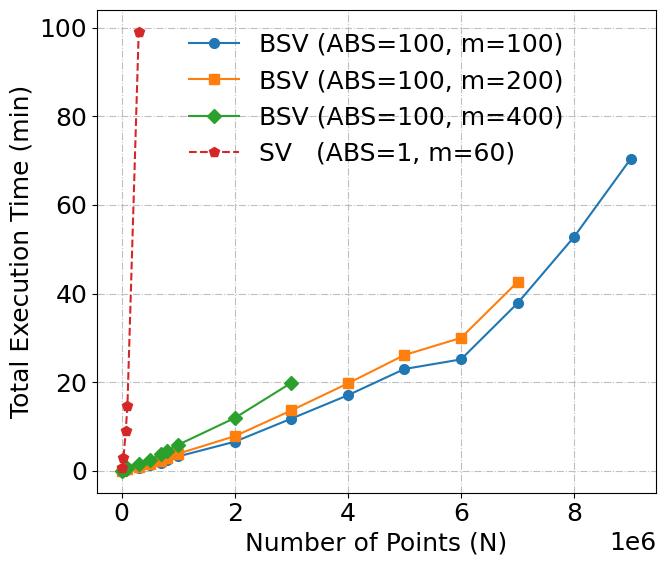

In [59]:
import matplotlib.pyplot as plt
import os

# Set default font size to 16
plt.rcParams.update({'font.size': 18})


plt.figure(figsize=(7, 6))
# Define different markers for each line
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', '8']


# Plot BSV lines for different m values
for i, N_b in enumerate(N_bs):
    for j, M_est in enumerate(M_ests):
        plt.plot(N_bsv[:len(total_time_bsv[i][j])], np.asarray(total_time_bsv[i][j])/60, 
                 label=f'BSV (ABS={N_b}, m={M_est})', 
                 marker=markers[i*len(M_ests)+j],
                 markersize=7)

# Plot SC line
plt.plot(N_sc[:len(total_time_sc)-1], np.asarray(total_time_sc[:len(total_time_sc) - 1])/60, 
         label='SV   (ABS=1, m=60)', 
         marker=markers[7], 
         linestyle='--',
         markersize=7)

plt.xlabel('Number of Points (N)')
plt.ylabel('Total Execution Time (min)')
# plt.title('Performance Comparison: BSV vs SV')
plt.grid(True, ls="-.", alpha=0.8)
plt.legend(framealpha=0.0)
# plt.xscale('log')  # Use log scale for x-axis due to large range
# plt.yscale('log')  # Use log scale for y-axis if times vary by orders of magnitude
plt.tight_layout()
os.makedirs('./fig', exist_ok=True)
plt.savefig('./fig/perf_total_time_bsv_vs_sv.pdf')
plt.show()

## Gflops/sec


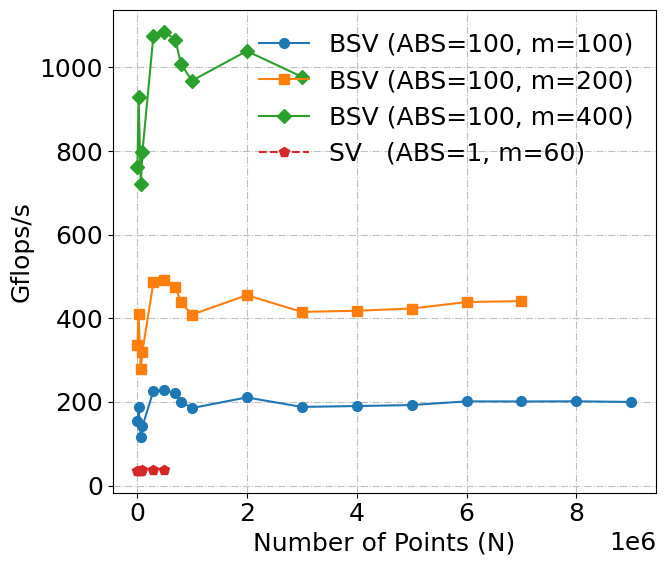

In [62]:
import matplotlib.pyplot as plt
import os

# Set default font size to 16
plt.rcParams.update({'font.size': 18})


plt.figure(figsize=(7, 6))
# Define different markers for each line
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', '8']


# Plot BSV lines for different m values
for i, N_b in enumerate(N_bs):
    for j, M_est in enumerate(M_ests):
        plt.plot(N_bsv[:len(gpu_time_bsv[i][j])], np.array(gflops_bsv[i][j])/np.array(gpu_time_bsv[i][j])*500, 
                 label=f'BSV (ABS={N_b}, m={M_est})', 
                 marker=markers[i*len(M_ests)+j],
                 markersize=7)

# Plot SC line
plt.plot(N_sc, np.array(gflops_sc)/np.array(gpu_time_sc)*500, 
         label='SV   (ABS=1, m=60)', 
         marker=markers[7], 
         linestyle='--',
         markersize=7)

plt.xlabel('Number of Points (N)')
plt.ylabel('Gflops/s')
# plt.title('Performance Comparison: BSV vs SV')
plt.grid(True, ls="-.", alpha=0.8)
plt.legend(framealpha=0.0)
# plt.ylim(-10, 1390)
# plt.xscale('log', base=2)  # Use log scale for x-axis due to large range
# plt.yscale('log')  # Use log scale for y-axis if times vary by orders of magnitude
plt.tight_layout()
os.makedirs('./fig', exist_ok=True)
plt.savefig('./fig/perf_GPU_bsv_vs_sv_gflops.pdf')
plt.show()

## Strong Scaling

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N_bsv = int(2 * 1e6) # single GPU max for BV 100/400

N_b=(100)
M_est=(400)

tag = ['base', '2', '4', '8']

seeds = [1, 2, 3]

total_time_bsv = []

for i in range(len(tag)):
    _total_time_bsv_seed = []
    for seed in seeds:
        # try:
        df = pd.read_csv(f'../log/A100_scaling/logFile_numPointsTotal{N_bsv}_numBlocksTotal{int(N_bsv/N_b)}_m{M_est}_seed{seed}_isScaled1_A100_scaling_{tag[i]}.csv')
        _total_time_bsv_seed.append(df['total'].iloc[0])
        # except FileNotFoundError:
        #     continue
    total_time_bsv.append(np.mean(_total_time_bsv_seed))

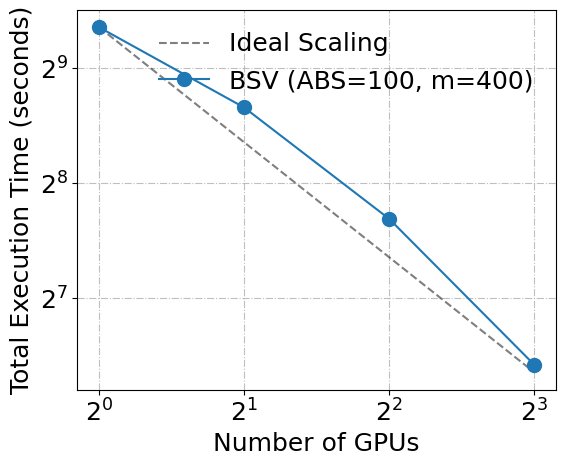

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Set default font size to 16
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(6, 5))

# Find the largest N that single GPU completed
N = N_bsv

# Create ideal scaling line
base_time = total_time_bsv[0]  # time for 1 GPU
x_ideal = [1, 2, 3, 4]  # Using list instead of np.array for equal spacing
y_ideal = [base_time / 2**i for i, _ in enumerate(x_ideal)]

# Plot
plt.plot(x_ideal, y_ideal, 'k--', label='Ideal Scaling', alpha=0.5)
plt.plot(x_ideal, total_time_bsv, 'o-', 
         label='BSV (ABS=100, m=400)', markersize=10)

plt.xlabel('Number of GPUs')
plt.ylabel('Total Execution Time (seconds)')
# plt.title(f'Strong Scaling: BSV (N={N/1000000:.2f}M, ABS=100, m=400)')
plt.grid(True, ls="-.", alpha=0.8)
plt.legend(framealpha=0.0)

# Set x-axis ticks with equal spacing
plt.xticks(x_ideal, ['$2^0$', '$2^1$', '$2^2$', '$2^3$'])

# Set y-axis to log scale with detailed values
plt.yscale('log', base=2)
# plt.ylim(min(min(times), min(y_ideal))*0.8, max(max(times), max(y_ideal))*1.2)

plt.tight_layout()
plt.savefig('./fig/perf_GPU_strong_scaling.pdf')
plt.show()

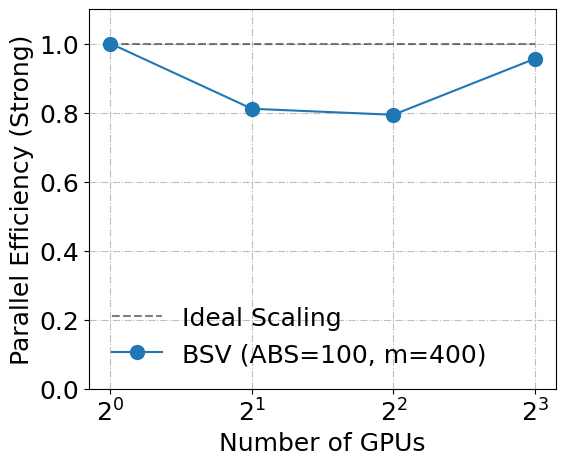

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Set default font size to 16
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(6, 5))

# Find the largest N that single GPU completed
N = N_bsv

# Create ideal scaling line
base_time = total_time_bsv[0]  # time for 1 GPU
x_ideal = [1, 2, 3, 4]  # Using list instead of np.array for equal spacing
y_ideal = [1 for i, _ in enumerate(x_ideal)]
num_pro = [1, 2, 4, 8]

# Plot
plt.plot(x_ideal, y_ideal, 'k--', label='Ideal Scaling', alpha=0.5)
plt.plot(x_ideal, total_time_bsv[0]/(total_time_bsv * np.asarray(num_pro)), 'o-', 
         label='BSV (ABS=100, m=400)', markersize=10)

plt.xlabel('Number of GPUs')
plt.ylabel('Parallel Efficiency (Strong)')
# plt.title(f'Strong Scaling: BSV (N={N/1000000:.2f}M, ABS=100, m=400)')
plt.grid(True, ls="-.", alpha=0.8)
plt.legend(framealpha=0.0)

# Set x-axis ticks with equal spacing
plt.xticks(x_ideal, ['$2^0$', '$2^1$', '$2^2$', '$2^3$'])

# Set y-axis to log scale with detailed values
# plt.yscale('log', base=2)
plt.ylim(0.0, 1.1)
# plt.ylim(min(min(times), min(y_ideal))*0.8, max(max(times), max(y_ideal))*1.2)

plt.tight_layout()
plt.savefig('./fig/perf_GPU_strong_scaling_parallel_efficiency.pdf')
plt.show()

## Weak Scaling

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N_bsv_base = int(2 * 1e6) # single GPU max for BV 100/400

N_b_base=(100)
M_est_base=(400)

tag = ['base', '2', '4', '8']
tag_num = [1, 2, 4, 8]

N_bsv = [int(N_bsv_base * num_process**(0.6)) for num_process in tag_num]
N_b = [int(N_b_base * num_process**(0.2)) for num_process in tag_num]
M_est = [int(M_est_base * num_process**(0.2)) for num_process in tag_num]

seeds = [1, 2, 3]

total_time_bsv = []

for i in range(len(tag)):
    _total_time_bsv_seed = []
    for seed in seeds:
        # try:
        df = pd.read_csv(f'../log/A100_scaling/logFile_numPointsTotal{N_bsv[i]}_numBlocksTotal{int(N_bsv[i]/N_b[i])}_m{M_est[i]}_seed{seed}_isScaled1_A100_scaling_{tag[i]}.csv')
        _total_time_bsv_seed.append(df['total'].iloc[0])
        # except FileNotFoundError:
        #     continue
    # print(_total_time_bsv_seed)
    total_time_bsv.append(np.mean(_total_time_bsv_seed))

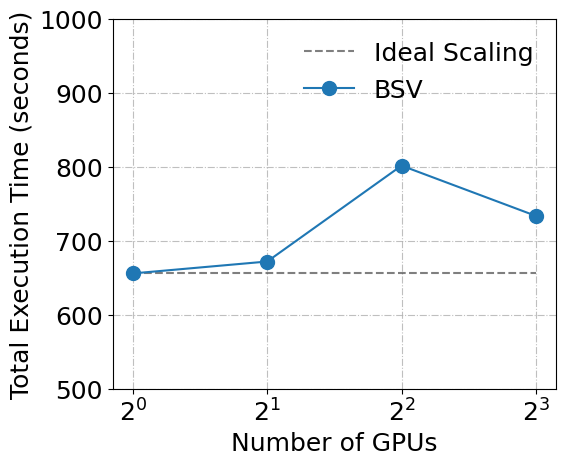

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Set default font size to 16
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(6, 5))

# Find the largest N that single GPU completed
N = N_bsv

# Create ideal scaling line
base_time = total_time_bsv[0]  # time for 1 GPU
x_ideal = [1, 2, 3, 4]  # Using list instead of np.array for equal spacing
y_ideal = [base_time for _, _ in enumerate(x_ideal)]

# Plot
plt.plot(x_ideal, y_ideal, 'k--', label='Ideal Scaling', alpha=0.5)
plt.plot(x_ideal, total_time_bsv, 'o-', 
         label='BSV', markersize=10)

plt.xlabel('Number of GPUs')
plt.ylabel('Total Execution Time (seconds)')
# plt.title(f'Strong Scaling: BSV (N={N/1000000:.2f}M, ABS=100, m=400)')
plt.grid(True, ls="-.", alpha=0.8)
plt.legend(framealpha=0.0)

# Set x-axis ticks with equal spacing
plt.xticks(x_ideal, ['$2^0$', '$2^1$', '$2^2$', '$2^3$'])

# Set y-axis to log scale with detailed values
# plt.yscale('log', base=2)
plt.ylim(500, 1000)
# plt.ylim(min(min(times), min(y_ideal))*0.8, max(max(times), max(y_ideal))*1.2)

plt.tight_layout()
plt.savefig('./fig/perf_GPU_weak_scaling.pdf')
plt.show()

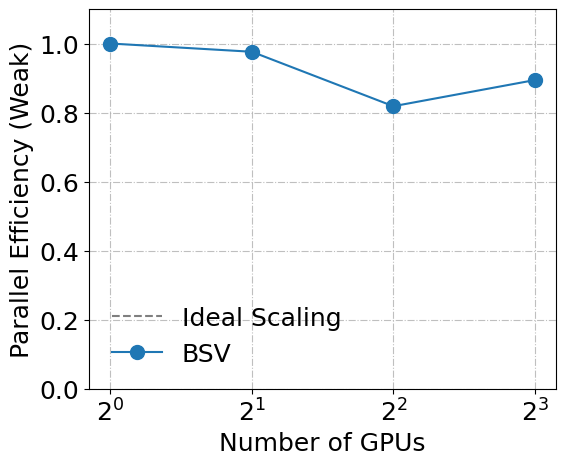

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Set default font size to 16
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(6, 5))

# Find the largest N that single GPU completed
N = N_bsv

# Create ideal scaling line
base_time = total_time_bsv[0]  # time for 1 GPU
x_ideal = [1, 2, 3, 4]  # Using list instead of np.array for equal spacing
y_ideal = [base_time for _, _ in enumerate(x_ideal)]

# Plot
plt.plot(x_ideal, y_ideal, 'k--', label='Ideal Scaling', alpha=0.5)
plt.plot(x_ideal, total_time_bsv[0]/(total_time_bsv), 'o-', 
         label='BSV', markersize=10)

plt.xlabel('Number of GPUs')
plt.ylabel('Parallel Efficiency (Weak)')
# plt.title(f'Strong Scaling: BSV (N={N/1000000:.2f}M, ABS=100, m=400)')
plt.grid(True, ls="-.", alpha=0.8)
plt.legend(framealpha=0.0)

# Set x-axis ticks with equal spacing
plt.xticks(x_ideal, ['$2^0$', '$2^1$', '$2^2$', '$2^3$'])

# Set y-axis to log scale with detailed values
# plt.yscale('log', base=2)
# plt.ylim(min(min(times), min(y_ideal))*0.8, max(max(times), max(y_ideal))*1.2)
plt.ylim(0., 1.1)
plt.tight_layout()
plt.savefig('./fig/perf_GPU_weak_scaling_parallel_efficiency.pdf')
plt.show()

## Multi & Single Comparison

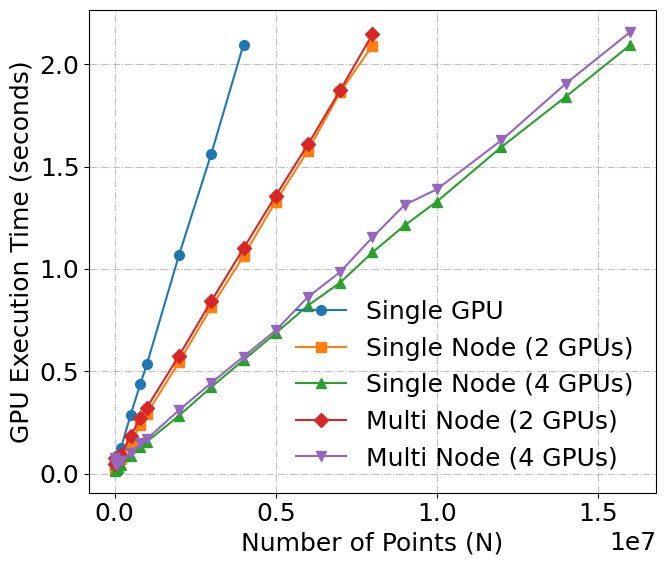

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Set default font size to 16
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(7, 6))

# Plot all configurations
plt.plot(N_bsv[:len(time_bsv_single1)], time_bsv_single1, 'o-', 
         label='Single GPU', markersize=7)
plt.plot(N_bsv[:len(time_bsv_single2)], time_bsv_single2, 's-', 
         label='Single Node (2 GPUs)', markersize=7)
plt.plot(N_bsv[:len(time_bsv_single4)], time_bsv_single4, '^-', 
         label='Single Node (4 GPUs)', markersize=7)
plt.plot(N_bsv[:len(time_bsv_multi2)], time_bsv_multi2, 'D-', 
         label='Multi Node (2 GPUs)', markersize=7)
plt.plot(N_bsv[:len(time_bsv_multi4)], time_bsv_multi4, 'v-', 
         label='Multi Node (4 GPUs)', markersize=7)

plt.xlabel('Number of Points (N)')
plt.ylabel('GPU Execution Time (seconds)')
plt.grid(True, ls="-.", alpha=0.8)
plt.legend(framealpha=0.0)
# plt.xscale('log')  # Use log scale for x-axis due to large range
# plt.yscale('log')  # Use log scale for y-axis

plt.tight_layout()
plt.savefig('./fig/perf_GPU_all_configs.pdf')
plt.show()